In [41]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
marks = {
    'Name': ['mehul', 'jane', 'jill'],
    'Roll': [10, 34, 6],
    'Physics': [99, 95, 89],
    'Chemistry': [93, 78, 95]
}

In [5]:
d1 = DataFrame(marks)
d1

,Name,Roll,Physics,Chemistry
0,mehul,10,99,93
1,jane,34,95,78
2,jill,6,89,95


In [8]:
print(d1.index)
print(d1.columns)
print(d1.info())

RangeIndex(start=0, stop=3, step=1)
Index(['Name', 'Roll', 'Physics', 'Chemistry'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       3 non-null      object
 1   Roll       3 non-null      int64 
 2   Physics    3 non-null      int64 
 3   Chemistry  3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes
None


In [10]:
d2 = DataFrame(marks, index=marks['Roll'], columns=['Name', 'Physics', 'Chemistry'])
d2

,Name,Physics,Chemistry
10,mehul,99,93
34,jane,95,78
6,jill,89,95


In [14]:
# indexing
# get student data whose roll no is 34
print(d2.loc[34])
# get student data whose roll no is 10 and 6
print(d2.loc[[10, 6]])

# get Physics marks scored by all the students
print(d2['Physics'])

# get Name and Chemistry marks scored by all the students
print(d2[['Name', 'Chemistry']])

Name         jane
Physics        95
Chemistry      78
Name: 34, dtype: object
     Name  Physics  Chemistry
10  mehul       99         93
6    jill       89         95
10    99
34    95
6     89
Name: Physics, dtype: int64
     Name  Chemistry
10  mehul         93
34   jane         78
6    jill         95


In [15]:
# get the Physics and Chemistry marks of students whose roll no is 10 and 6
d2.loc[[10, 6], ['Physics', 'Chemistry']]

,Physics,Chemistry
10,99,93
6,89,95


In [16]:
d2

,Name,Physics,Chemistry
10,mehul,99,93
34,jane,95,78
6,jill,89,95


In [17]:
# get the student data of the first and last student
d2.iloc[[0, -1]]

,Name,Physics,Chemistry
10,mehul,99,93
6,jill,89,95


In [19]:
# get Physics and Chemistry marks of the first and last student
d2.iloc[[0, -1], [1, 2]]

,Physics,Chemistry
10,99,93
6,89,95


In [20]:
# slicing
# get the student data of the first 2 students of the class
d2.iloc[:2]

,Name,Physics,Chemistry
10,mehul,99,93
34,jane,95,78


In [21]:
d2

,Name,Physics,Chemistry
10,mehul,99,93
34,jane,95,78
6,jill,89,95


In [24]:
maths_series = Series([99, 56, 67], index=[6, 10, 34])
maths_series

6     99
10    56
34    67
dtype: int64

In [25]:
# add a new column Maths to d2 where data comes from a separate Series
d2['Maths'] = maths_series
d2

,Name,Physics,Chemistry,Maths
10,mehul,99,93,56
34,jane,95,78,67
6,jill,89,95,99


In [26]:
# add a derived column 'Total' (PCM) to d2
d2['Total'] = d2['Physics'] + d2['Chemistry'] + d2['Maths']

In [27]:
d2

,Name,Physics,Chemistry,Maths,Total
10,mehul,99,93,56,248
34,jane,95,78,67,240
6,jill,89,95,99,283


In [28]:
d3 = d2.copy()
d3

,Name,Physics,Chemistry,Maths,Total
10,mehul,99,93,56,248
34,jane,95,78,67,240
6,jill,89,95,99,283


In [29]:
del d3['Name']
d3

,Physics,Chemistry,Maths,Total
10,99,93,56,248
34,95,78,67,240
6,89,95,99,283


In [30]:
d2

,Name,Physics,Chemistry,Maths,Total
10,mehul,99,93,56,248
34,jane,95,78,67,240
6,jill,89,95,99,283


In [31]:
d3

,Physics,Chemistry,Maths,Total
10,99,93,56,248
34,95,78,67,240
6,89,95,99,283


In [32]:
# aggregations
d3.mean(axis=0)

Physics       94.333333
Chemistry     88.666667
Maths         74.000000
Total        257.000000
dtype: float64

In [33]:
d4 = d3[['Physics', 'Chemistry', 'Maths']]
d4

,Physics,Chemistry,Maths
10,99,93,56
34,95,78,67
6,89,95,99


In [34]:
d4.sum(axis=1)

10    248
34    240
6     283
dtype: int64

In [36]:
d5 = DataFrame([
    [89, 96],
    [90, 67],
    [88, 87]
], index=[34, 6, 10], columns=['Verbal', 'Quant'])
d5

,Verbal,Quant
34,89,96
6,90,67
10,88,87


In [39]:
d6 = d4.merge(d5, left_index=True, right_index=True)
d6

,Physics,Chemistry,Maths,Verbal,Quant
10,99,93,56,88,87
34,95,78,67,89,96
6,89,95,99,90,67


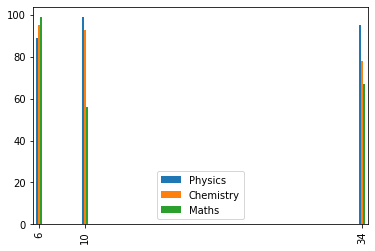

In [42]:
d4.plot(kind='bar')
plt.show()